In [29]:
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
NB = GaussianNB()

# Train the model using the training sets 
NB.fit(X_train, y_train)

#Predict Output 
predicted= NB.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score (y_test, predicted))

from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print (report)

from sklearn.metrics import confusion_matrix
conf= confusion_matrix(y_test,predicted)
print (conf)

0.9736842105263158
             precision    recall  f1-score   support

          0       1.00      0.93      0.96        43
          1       0.96      1.00      0.98        71

avg / total       0.97      0.97      0.97       114

[[40  3]
 [ 0 71]]


In [65]:
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='entropy') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
DT.fit(X_train, y_train)
#Predict Output
predicted= DT.predict(X_test)


print(accuracy_score (y_test, predicted))
report = classification_report(y_test, predicted)
print (report)
conf= confusion_matrix(y_test,predicted)
print (conf)

0.9473684210526315
             precision    recall  f1-score   support

          0       0.97      0.88      0.93        43
          1       0.93      0.99      0.96        71

avg / total       0.95      0.95      0.95       114

[[38  5]
 [ 1 70]]


In [69]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print (accuracy_score(y_test, y_pred))

0.9298245614035088


In [53]:
accscr =np.empty((25))
kvalues = np.empty((25))
for K in range(25):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_test)
 accscr[K] = accuracy_score(y_test,y_pred)*100
 kvalues[K]= K+1
 print ("Accuracy is ", accscr[K],"% for K-Value:",K_value)

Accuracy is  92.98245614035088 % for K-Value: 1
Accuracy is  92.98245614035088 % for K-Value: 2
Accuracy is  92.98245614035088 % for K-Value: 3
Accuracy is  93.85964912280701 % for K-Value: 4
Accuracy is  95.6140350877193 % for K-Value: 5
Accuracy is  96.49122807017544 % for K-Value: 6
Accuracy is  95.6140350877193 % for K-Value: 7
Accuracy is  95.6140350877193 % for K-Value: 8
Accuracy is  95.6140350877193 % for K-Value: 9
Accuracy is  97.36842105263158 % for K-Value: 10
Accuracy is  98.24561403508771 % for K-Value: 11
Accuracy is  98.24561403508771 % for K-Value: 12
Accuracy is  97.36842105263158 % for K-Value: 13
Accuracy is  97.36842105263158 % for K-Value: 14
Accuracy is  96.49122807017544 % for K-Value: 15
Accuracy is  96.49122807017544 % for K-Value: 16
Accuracy is  96.49122807017544 % for K-Value: 17
Accuracy is  96.49122807017544 % for K-Value: 18
Accuracy is  96.49122807017544 % for K-Value: 19
Accuracy is  96.49122807017544 % for K-Value: 20
Accuracy is  96.49122807017544 % 

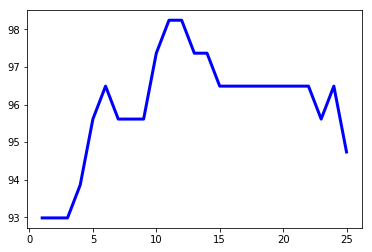

In [54]:
import matplotlib.pyplot as plt

plt.plot(kvalues, accscr, color='blue', linewidth=3)

plt.show()

In [70]:
#X=np.append(X_train, X_test,axis = 0) 
#y=np.append(y_train, y_test,axis = 0) 
from sklearn import cross_validation, metrics 
cv_score = cross_validation.cross_val_score(knn, X, y, cv=5, scoring='accuracy')#or scoring=roc_auc
print(cv_score)
print(cv_score.mean())

[0.51304348 0.5826087  0.53097345 0.50442478 0.54867257]
0.5359445940746441


In [62]:
from sklearn import cross_validation, metrics 
cv_score = cross_validation.cross_val_score(DT, X, y, cv=2, scoring='precision')
print(cv_score)
print(cv_score.mean())

[0.67346939 0.65697674]
0.6652230659705742


In [63]:
from sklearn import cross_validation, metrics 
cv_score = cross_validation.cross_val_score(NB, X, y, cv=2, scoring='recall')
print(cv_score)
print(cv_score.mean())

[0.69832402 0.78651685]
0.7424204381394766
